### 5. Khách hàng muốn mở một cửa hàng kinh doanh về sản phẩm là văn phòng phẩm tại khu vực phía Tây của nước Mỹ thì có nên xác định đối tượng khách hàng là Consumer hay không?


In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet 

c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


##### 1. Đọc dữ liệu

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000
1,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000
2,12/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000
3,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,201.864499
4,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\pandas\core\tools\datetim

In [5]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [6]:
df1 = df[(df['Segment'] == 'Consumer') & (df['Region'] == 'West') & (df['Category'] == 'Office Supplies')] 

In [7]:
df1

,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
6,2015-09-06,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.280
8,2015-09-06,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504
9,2015-09-06,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900
13,2017-05-12,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976
17,2015-05-13,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,West,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,2017-07-11,LD-17005,Lisa DeCherney,Consumer,United States,San Francisco,California,West,Office Supplies,Binders,GBC VeloBinder Manual Binding System,57.584
9729,2015-09-29,EB-14170,Evan Bailliet,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,GBC Standard Plastic Binding Systems' Combs,10.048
9730,2015-09-29,EB-14170,Evan Bailliet,Consumer,United States,Seattle,Washington,West,Office Supplies,Storage,Fellowes Super Stor/Drawer Files,807.750
9731,2018-11-14,JE-15715,Joe Elijah,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,Newell 347,34.240


In [8]:
frame = df1.drop(columns=['Customer ID','Customer Name','Segment','Country','City','State','Region','Category','Sub-Category','Product Name'])

In [9]:
frame.columns = ['ds','y']
frame 

,ds,y
6,2015-09-06,7.280
8,2015-09-06,18.504
9,2015-09-06,114.900
13,2017-05-12,407.976
17,2015-05-13,55.500
...,...,...
9715,2017-07-11,57.584
9729,2015-09-29,10.048
9730,2015-09-29,807.750
9731,2018-11-14,34.240


In [10]:
m = Prophet()
# m.add_country_holidays(country_name = 'US') 
m.fit(frame)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail() 

,ds
809,2019-12-26
810,2019-12-27
811,2019-12-28
812,2019-12-29
813,2019-12-30


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,145.111950,-265.960524,570.299821
1,2015-01-08,124.610546,-285.594661,514.828977
2,2015-01-09,126.481106,-288.623234,512.351119
3,2015-01-11,148.295750,-256.809783,547.564871
4,2015-01-13,128.340464,-277.785045,533.322185
...,...,...,...,...
809,2019-12-26,107.636770,-274.994539,529.165782
810,2019-12-27,109.689298,-303.183657,509.421864
811,2019-12-28,173.249849,-236.089183,581.300558
812,2019-12-29,130.690608,-261.834017,483.307365


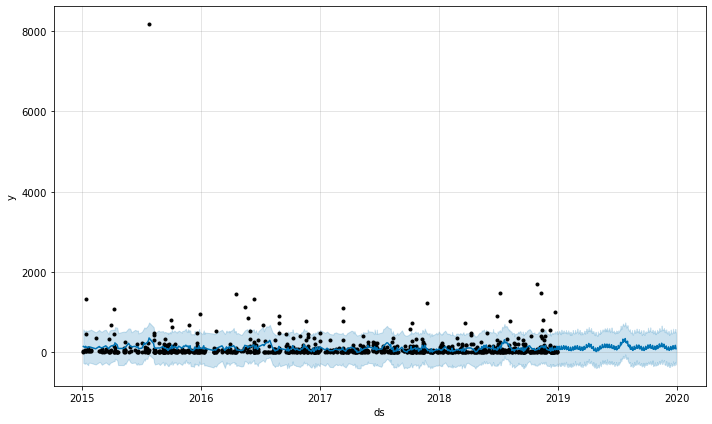

In [13]:
fig1 = m.plot(forecast)

c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


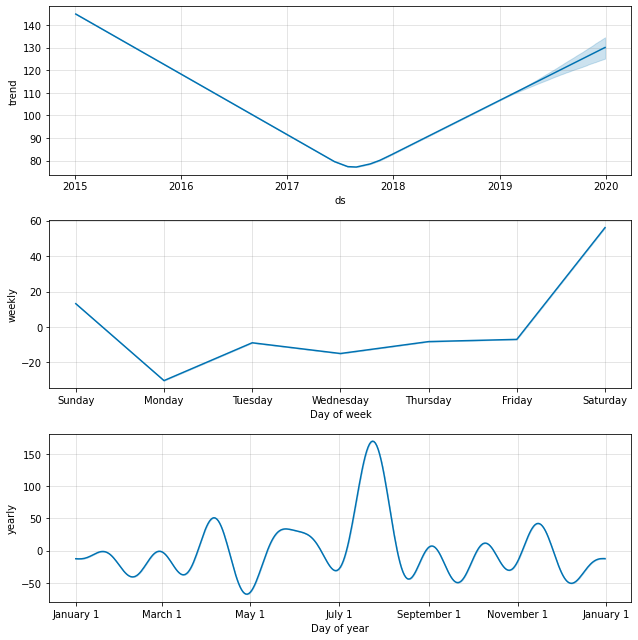

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
# from prophet.plot import add_changepoints_to_plot
# fig = m.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [16]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [17]:
df1.shape

(974, 12)

In [18]:
df_cv = cross_validation(m, initial='320 days', period='180 days', horizon = '365 days')
# Đo lường, kiểm định lại mô hình bằng cách so sánh các chỉ số thực với chỉ số dự báo
# initial: Dự báo ban đầu, 
# Period: Một khoảng thời gian dự báo là một khoảng thời gian xác định trong tương lai được thực hiện
# để chuẩn bị ước tính những gì được cho là có thể xảy ra trong thời gian đó.
# Horizon: Là khoảng thời gian dự báo trong tương lai mà dự báo sẽ chuẩn bị.

INFO:prophet:Making 5 forecasts with cutoffs between 2016-01-10 00:00:00 and 2017-12-30 00:00:00
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Acer Nitro5\anaconda3\envs\time_series\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 20%|██        | 1/5 [00:01<00:06,  1.57s/it]c:\Users\Acer 

In [19]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-11,-238.897303,-948.682887,477.359588,7.880,2016-01-10
1,2016-01-12,-86.274523,-799.397315,645.390323,55.424,2016-01-10
2,2016-01-13,-191.609118,-819.158257,498.895966,70.008,2016-01-10
3,2016-02-08,-239.316536,-930.720062,486.693610,6.368,2016-01-10
4,2016-02-10,-166.225645,-888.118756,519.570909,53.568,2016-01-10
...,...,...,...,...,...,...
1279,2018-12-24,-33.793215,-456.058812,400.312003,1003.620,2017-12-30
1280,2018-12-28,-4.289668,-488.706770,445.245444,4.280,2017-12-30
1281,2018-12-28,-4.289668,-441.868275,455.954055,118.250,2017-12-30
1282,2018-12-29,136.121834,-336.659212,580.697245,19.600,2017-12-30


In [20]:
df_perf = performance_metrics(df_cv)
df_perf
# MAPE (Mean absolute percentage error) là phần trăm sai số trung bình tuyệt đối. Lỗi phần trăm tuyệt đối trung bình 
# (MAPE) là thước đo thống kê mức độ chính xác của một hệ thống dự báo.

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,43 days,58929.150736,242.753271,159.070077,11.969355,2.492510,1.434763,0.960938
1,44 days,58371.018254,241.600948,157.137762,11.760753,2.472681,1.435496,0.960938
2,45 days,58265.104357,241.381657,156.181828,11.557305,2.460551,1.426431,0.960937
3,46 days,58244.467999,241.338907,156.071232,11.449230,2.460551,1.416332,0.960937
4,47 days,58669.842830,242.218585,157.500094,11.680392,2.460551,1.422487,0.960938
...,...,...,...,...,...,...,...,...
276,361 days,50570.708290,224.879319,143.484446,6.451469,1.838842,1.532909,0.976563
277,362 days,49918.463883,223.424403,142.566603,6.295844,1.737989,1.529776,0.976562
278,363 days,49847.955556,223.266557,144.074917,6.228198,1.838842,1.576049,0.976563
279,364 days,51066.881800,225.979826,148.885353,6.418704,1.984116,1.581836,0.976562


In [21]:
df_perf = df_perf[['horizon','mape']] 

In [26]:
df_perf[['mape']].describe()

,mape
count,281.000000
mean,7.542578
std,1.817464
min,4.445667
25%,6.512649
50%,7.152366
75%,8.103629
max,13.654754


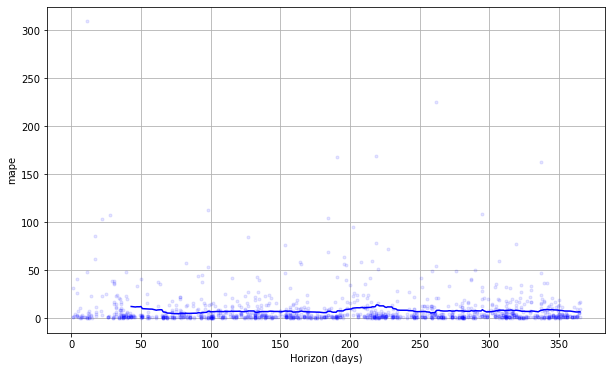

In [23]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape') 